In [9]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r"C:\Users\admin\Desktop\DATA SCIENCE\Machine Learning\machine learning dataset\heart.csv")

In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [8]:
df["trestbps"].describe()

count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: trestbps, dtype: float64

<AxesSubplot:xlabel='trestbps', ylabel='Density'>

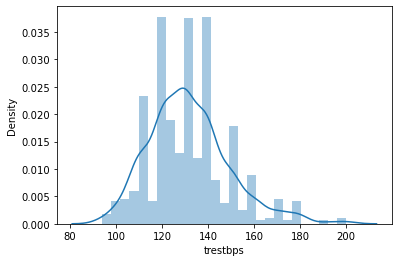

In [11]:
sns.distplot(df["trestbps"])

<AxesSubplot:xlabel='trestbps'>

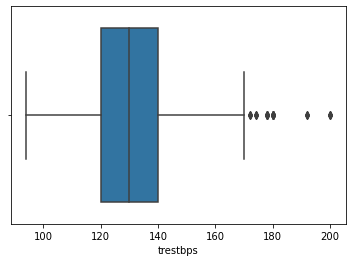

In [12]:
sns.boxplot(df["trestbps"])

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
clist=['trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [32]:
def odiqr(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5 * iqr)
    high = q3 + (1.5 * iqr)
    m = df.mean()
    df = df.apply(lambda x : m if x < low else (m if x > high else x ) )
    for i in clist:
        df[i] = odiqr(df[i])

In [27]:
for i in clist:
    df[i] = odiqr(df[i])

<AxesSubplot:xlabel='trestbps', ylabel='Density'>

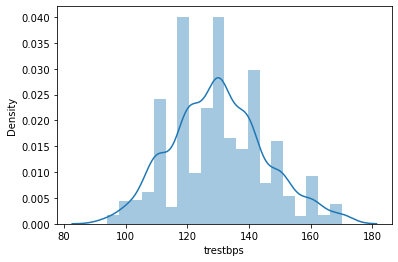

In [33]:
sns.distplot(df["trestbps"])

<AxesSubplot:xlabel='trestbps'>

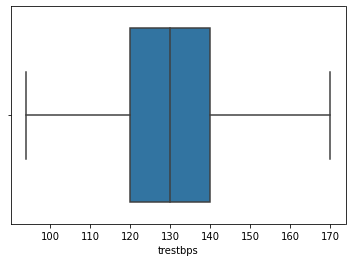

In [29]:
sns.boxplot(df["trestbps"])

In [34]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression,LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [35]:
kf=KFold(n_splits=10)
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
lr=LinearRegression()
lreg=LogisticRegressionCV()
svm=SVC()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
knn=KNeighborsClassifier()

In [36]:
algo=[rfc,lreg,lr,dtc,svm,abc,bc,knn]

In [37]:
X=df.drop("target",axis=1)

In [38]:
y=df["target"]

In [39]:
for m in algo:
    res=cross_val_score(m,X,y,cv=kf)
    print("score of ",m,"is",res.mean())

score of  RandomForestClassifier() is 0.9970588235294118
score of  LogisticRegressionCV() is 0.8526270702455738
score of  LinearRegression() is 0.5265710148414372
score of  DecisionTreeClassifier() is 0.9970873786407767
score of  SVC() is 0.6925756710451172
score of  AdaBoostClassifier() is 0.896592423377118
score of  BaggingClassifier() is 0.9951170759565962
score of  KNeighborsClassifier() is 0.7668189605939463
